<a href="https://colab.research.google.com/github/SallyHummran24/onlinefoods/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


warnings.filterwarnings('ignore')

In [ ]:


from google.colab import files
uploaded = files.upload()


Saving cars.csv to cars.csv


In [ ]:

import io

path = "/content/sample_data/cars.csv"
df = pd.read_csv('/content/sample_data/cars.csv',encoding='unicode_escape')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              7253 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 680.1+ KB


Data Clean

In [14]:
df['Name']=df['Name'].astype('str')

In [17]:
df['Fuel_Type']=df['Fuel_Type'].astype('str')

In [15]:
df['Location']=df['Location'].astype('str')

In [18]:
df['Transmission']=df['Transmission'].astype('str')

In [19]:
df['Owner_Type']=df['Owner_Type'].astype('str')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              7253 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 680.1+ KB


In [28]:
df.Location.describe()


count       7253
unique        11
top       Mumbai
freq         949
Name: Location, dtype: object

In [30]:
df.Price.describe()

count      7253.000000
mean      15545.206259
std       25965.181157
min        1000.000000
25%        4281.000000
50%        6091.000000
75%        7896.000000
max      350000.000000
Name: Price, dtype: float64

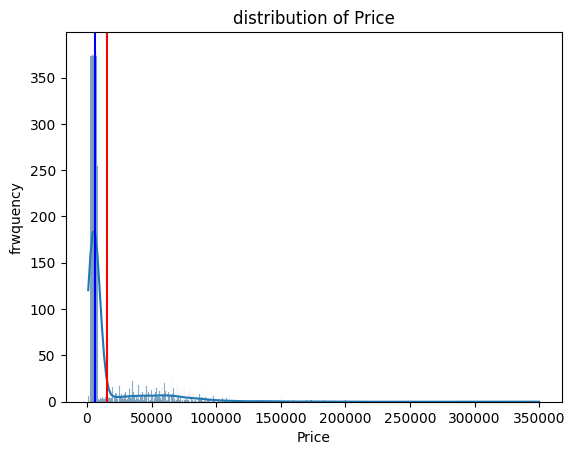

In [31]:
sns.histplot(data=df,x='Price',kde='true')
plt.title('distribution of Price')
plt.xlabel('Price')
plt.ylabel('frwquency')

plt.axvline(df.Price.mean(),color='red')
plt.axvline(df.Price.median() ,color='blue')



the median is more accurate

In [32]:
px.box (data_frame=df , x='Price')


notice we have values outside after 200000 so we will truncate them

In [33]:
df=df[df.Price<200000]

In [34]:
px.box (data_frame=df , x='Price')

the maximum price is the upper fence which equals to 13k
and we notice also that the range is between q` =4279 and q3=7891

In [35]:
#number of orders in each location

df.Location.value_counts()


Location
Mumbai        947
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       590
Jaipur        497
Bangalore     439
Ahmedabad     274
Name: count, dtype: int64

In [36]:
px.bar(data_frame=df.Location.value_counts(), title='data')

the most location that uses cars is mumbai as above

In [37]:
px.pie(data_frame=df, names='Location', title='data')


the previouse chart shows the percentage of each location

In [40]:
df.groupby('Location')['Price'].sum().sort_values(ascending=False)


Location
Pune          13964737
Mumbai        13532647
Hyderabad     13115854
Coimbatore    11254553
Kochi         10757454
Delhi          9794193
Kolkata        9595439
Chennai        9288612
Jaipur         8460235
Bangalore      6797397
Ahmedabad      4451260
Name: Price, dtype: int64

notice that the hiest prices are in Pune Mumbai Hyderabad

In [44]:
def plots(colname,Top10=False):
 prop=df.groupby(colname, as_index=False)['Price'].sum()
 prop['propration']=(prop.Price / df.Price.sum())*100
 prop=prop.sort_values('propration',ascending=False)
 print('Describing of all total Price values',prop.Price.describe())
 if Top10==True :
     prop=prop.head(10)
 fig1=px.bar(data_frame=prop,x=colname,y='Price')
 fig2=px.pie(data_frame=prop,names=colname,values='Price')


 fig1.show()
 fig2.show()
plots('Location')

Describing of all total Price values count    1.100000e+01
mean     1.009203e+07
std      2.899826e+06
min      4.451260e+06
25%      8.874424e+06
50%      9.794193e+06
75%      1.218520e+07
max      1.396474e+07
Name: Price, dtype: float64


now we see which year te prices got higher

In [45]:
total_date=df[['Year','Price']]

In [46]:
total_date=total_date.set_index('Year')

In [47]:
px.line(data_frame=total_date)

we notice crazy values in 2010 and above

In [48]:
total_date2=df[['Owner_Type','Price']]

In [49]:
total_date2=total_date2.set_index('Owner_Type')

In [50]:
px.line(data_frame=total_date2)

we notice that most of the owner tyes are from the first hand users